In [35]:
import pandas as pd

In [36]:
df = pd.read_csv('../build_root/results/nasus/results.csv')

In [37]:
df.head()

,branch,samples,seed,selectivity,parallelism,read_ios,write_ios,hit_rate,heap_blks_hit,heap_blks_read,idx_blks_hit,idx_blks_read,blk_read_time
0,pbm1,NaN,15930,0.1,32,126857453.0,7566.0,0.524463,191211383,173373385,312637,31984,2.942855e+07
1,pbm2,20.0,9774,0.1,128,196828099.0,10888.0,0.834983,887521642,175399958,613818,389678,4.901991e+07
2,pbm1,NaN,4448,0.1,128,174343412.0,18526.0,0.744545,432937894,148542010,528294,20088,5.385444e+07
3,base,NaN,15930,0.1,32,121156888.0,9206.0,0.519433,184894871,171060009,332910,3088,2.800576e+07
4,pbm2,20.0,9774,0.1,64,177945313.0,14215.0,0.772653,687788535,202376713,452391,387505,3.812105e+07


In [44]:
df['total_io_read_blks'] = df['idx_blks_read'] + df['heap_blks_read']
df['total_processed_blks'] = df['total_io_read_blks'] + df['idx_blks_hit'] + df['heap_blks_hit']
df['io_gb'] = df['total_io_read_blks'] * 8 / (2 ** 20)
df['total_gb'] = df['total_processed_blks'] * 8 / (2 ** 20)

4     4
8     3
9     2
11    4
12    1
17    0
19    4
21    3
25    2
26    1
27    3
28    1
32    2
33    0
34    1
43    2
45    1
51    3
52    2
56    1
62    0
66    3
67    4
68    2
70    3
71    0
74    0
76    1
77    2
80    3
82    4
87    4
88    0
89    4
90    0
dtype: int8


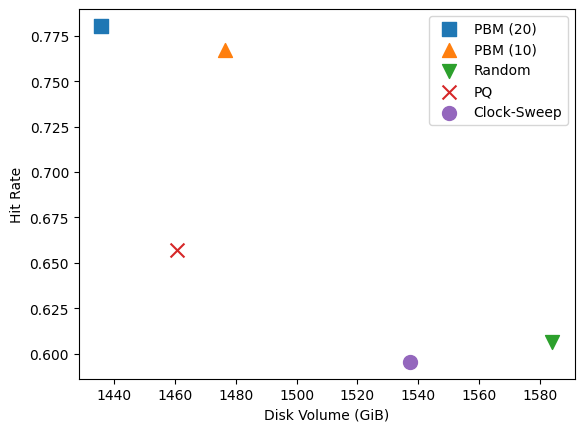

In [48]:
import matplotlib.pyplot as plt 

df['variation'] = df['branch'].astype(str) + ' ' + df['samples'].astype(str)
print(colors)
filtered = df[df['parallelism'] == 64]

variations = filtered['variation'].unique()
for variation in variations: 
    data = filtered[filtered['variation'] == variation]
    labelmap = {
        'base nan': 'Clock-Sweep', 
        'pbm1 nan': 'PQ', 
        'pbm2 1.0': 'Random', 
        'pbm2 10.0': 'PBM (10)', 
        'pbm2 20.0': 'PBM (20)',
    }
    markermap = {
        'base nan': 'o', 
        'pbm1 nan': 'x', 
        'pbm2 1.0': 'v', 
        'pbm2 10.0': '^', 
        'pbm2 20.0': 's'
    }
    
    x = data['io_gb']
    y = data['hit_rate']
    
    avg_x = x.mean()
    avg_y = y.mean()
    # plt.scatter(x, y, label=labelmap[variation], marker=markermap[variation], s=60, alpha=0.5)
    plt.scatter(avg_x, avg_y, label=labelmap[variation], marker=markermap[variation], s=100, alpha=1)
    

plt.xlabel('Disk Volume (GiB)')
plt.ylabel('Hit Rate')
# increase resolution: 
plt.legend()